# Wrangle WeRateDogs Twitter Data

 In this project, I wil wrangle data from a Twitter acount name WeRateDogs. WeRateDogs publish picture of a dog and give a rating. The rating scale is 0 - 10. The three steps for this project is Gather data, Access data, and Clean data.

## Gather data

In [169]:
#import the necessary Package 
import pandas as pd
#read the csv file 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [37]:
# check the data
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Importing file from a URL

In the following code, I will be importing tweet image prediction from Udacity server by using requests library and a given URL that is provide by Udacity

In [395]:
#importing image-prediction from giving URL/download programmatically
# URL= https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
import os
import requests
folder_name = 'image-prediction'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [38]:
df_images = pd.read_table('image-prediction/image-predictions.tsv',
                          sep='\t')

### Gather data for retweet and favorite count

Due the Coronavirus, Twitter haven't approve my developer requests so I decide to use data and the code that is provided by Udacity

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [399]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

TypeError: 'numpy.int64' object is not callable

In [400]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# I use # to block long list output of the loop
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

KeyboardInterrupt: 

In [4]:
# Meanwhile facing the read json file. I seeking help from Udacity
# I get help from Udacity: https://knowledge.udacity.com/questions/78063
# read the json.txt file 
# Read as dict object using json.loads
df_json = pd.read_table('tweet-json.txt', header=None,converters={column: json.loads for column in [0]})
# Convert to list object
tweets = []
for i in range(len(df_json)):
    tweets.append(df_json[0][i])
# Convert to DataFrame object
df_json = pd.DataFrame(tweets)

In [62]:
df_json.head()

,0
0,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...
1,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...
2,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...
3,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...
4,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...


## Access Data

In this part, I have to detect and document at least eight (8) quality issues and two (2) tidiness issues. To meet specifications, the issues that satisfy the Project Motivation are provide:
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### First: df (twitter-archive-enhanced.csv)

In [72]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [74]:
# to find if all the name is a proper name
# Oberseve all Proper name start with captial and inpropor name start with lowercase
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [75]:
df.tweet_id.duplicated().sum()

0

In [10]:
df.expanded_urls.isna().sum()

59

In [15]:
# line 19 contain retweet
# some text contain URL
df[['text']]

,source
0,"<a href=""http://twitter.com/download/iphone"" r..."
1,"<a href=""http://twitter.com/download/iphone"" r..."
2,"<a href=""http://twitter.com/download/iphone"" r..."
3,"<a href=""http://twitter.com/download/iphone"" r..."
4,"<a href=""http://twitter.com/download/iphone"" r..."
5,"<a href=""http://twitter.com/download/iphone"" r..."
6,"<a href=""http://twitter.com/download/iphone"" r..."
7,"<a href=""http://twitter.com/download/iphone"" r..."
8,"<a href=""http://twitter.com/download/iphone"" r..."
9,"<a href=""http://twitter.com/download/iphone"" r..."


In [20]:
# incorrect denominator
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [13]:
df.expanded_urls.duplicated().sum()

137

### Second, Image-Prediction (image-predictions.tsv)

In [41]:
# all the url only contain 1 image but some img_num has number bigger than 1
df_images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1966,867774946302451713,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,2,Border_collie,0.661953,True,Cardigan,0.175718,True,collie,0.087142,True
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
47,666817836334096384,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953,True,standard_schnauzer,0.285276,True,giant_schnauzer,0.073764,True
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True


In [28]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
df_images.jpg_url.duplicated().sum()

66

In [62]:
sum(df_images['p2_conf'] < 0)

0

### Third, df_json ( tweet-json.txt)

In [6]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [48]:
df_json.sample(10)

,id,favorite_count,retweet_count
224,849051919805034497,32617,7396
983,749075273010798592,6353,2360
287,838476387338051585,24664,5484
2265,667524857454854144,1798,1198
578,800513324630806528,14685,3495
1722,680085611152338944,13959,10034
75,878057613040115712,42876,7181
48,882762694511734784,28903,5134
531,808001312164028416,14015,4098
1434,697255105972801536,3316,1315


### Quanlity Issue

#### df
- Incorrect values in rating numerators
- Incorrect denominator (In the project overview "These ratings always have a denominator of 10.")
- Incorrect name (name such as a, none, etc)
- Duplicated extend URL
- Remove URL from Source
- ID should be store as string

#### df_image
- Incorrect image number
- Duplicated URL

#### df_Twcl

### Tidness Issue

- Merge all the dataframe into one

#### df
- Creat a new column to display the URL in the text (separate the text and url in the text column
- combine puppo, doggo, floofer, pupppo into one column
- In the Text column there are row's text separate by /n
- Cut down the dataframe into small piece ( selected the columns that we need)

#### df_image
- rename the for p1,p2,p3
#### df_json
- Cut down the dataframe into small piece ( selected the columns that we need)

## Clean

In [170]:
# Copy the three data frame
df_clean=df.copy()
df_images_clean=df_images.copy()
df_json_clean=df_json.copy()

#### Define
- ID should be store as string
- Incorrect values in rating numerators （9.75/10 show numerator of 75)

#### Code


In [172]:
#change ID from int64 to string
#The other id will be remove in the later of the section
df_clean['tweet_id'] = df_clean.to_string(columns = ['tweet_id'])
df_images_clean['tweet_id'] = df_images_clean.to_string(columns = ['tweet_id'])
df_json_clean['id'] = df_json_clean.to_string(columns = ['id'])

#### Test

In [58]:
# tweet_id change from int64 to object
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### Define
- Incorrect denominator (denominator should be 10 but there is number as 20,30, etc)

#### Code


In [59]:
import sys
#find length of columns
len=df_clean.rating_denominator.count()
i=0
# Using while loop to change all denominator into 10
while i < len:
    if df_clean.rating_denominator[i] > 10:
        df_clean.rating_denominator[i]=10
    i=i+1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [60]:
df_clean[df_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

- Incorrect name (name such as a, none, etc)

#### code

In [61]:
#redeclear i
i=0
len=df_clean['name'].count()
# Using while loop to find all name start with lower case and replace with None
while i < len:
    if df_clean.name[i].islower():
        df_clean.name[i]=None
    i=i+1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [62]:
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1179,719367763014393856,NaN,NaN,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sid &amp; Murphy. Murphy floats alongside...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,None,None,None,None
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monster. Not an actual monster tho. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781...,12,10,Monster,None,None,None,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,None,None,None,None,None
142,864279568663928832,NaN,NaN,2017-05-16 00:41:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meatball. He doing what's known in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864279568...,12,10,Meatball,None,None,None,None
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,11,10,None,None,None,None,None


#### Define

- Duplicated extend URL

#### Code

In [74]:
# Since the extend URL is the same which it lead us to the same website and we can drop the duplicated row
df_clean.expanded_urls.drop_duplicates(inplace=True)

#### Test

In [64]:
#orinal file
df.expanded_urls.duplicated().sum()

137

In [65]:
#after clean
df_clean.expanded_urls.duplicated().sum()

0

#### Define

- Remove URL from Source

#### Code

In [66]:
#redeclear i
i=0
# Using while loop to delete useless information
while i < len:
    if df_clean.source[i] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        df_clean.source[i]='Twitter for iPhone'
    elif df_clean.source[i] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        df_clean.source[i]='Vine'
    elif df_clean.source[i]== '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        df_clean.source[i]='Twitter Web Client'
    else:
        df_clean.source[i]='TweetDeck'
    i=i+1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is tryi

In [67]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,Twitter for iPhone,This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,Twitter for iPhone,Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36 +0000,Twitter for iPhone,This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,Twitter for iPhone,This is Snicku. He's having trouble reading be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796387464...,12,10,Snicku,None,None,None,None


#### Define

- Incorrect values in rating numerators （9.75/10 show numerator of 75)
"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10"

#### Code

In [55]:
df_clean['rating_numerator'] = df_clean.rating_numerator.astype(float)
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean.rating_numerator = ratings

#### Test

In [79]:
#after clean
df_clean.loc[340]


tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                                                       Twitter for iPhone
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                           9.75
rating_denominator                                                           10
name                                    

In [80]:
#Original information
df.loc[340]

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

#### Define

- Incorrect image number

#### Code

In [81]:
df_images_clean['img_num']=1

#### Test

In [82]:
df_images_clean.img_num.unique()

array([1])

#### Define

- Duplicated jpg_url

#### Code


In [83]:
df_images_clean.jpg_url.drop_duplicates(inplace=True)

#### Test

In [84]:
df_images_clean.jpg_url.duplicated().sum()

0

#### Define 

- Cut down the dataframe into small piece ( selected the columns that we need)

#### Code

In [85]:
#df_json
df_json_clean=df_json_clean[['id', 'retweet_count', 'favorite_count']]

In [86]:
#df
# drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',], axis=1)

#### Test

In [25]:
df_json_clean.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Define

- For the puppo, doggo, floofer, pupppo replace None with space for easy observation
- creat stage to store combination of the dog_stage
- Delete puppo, doggo, floofer, pupppo

#### Code

In [163]:
#replcae Nan with space
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
#Create a new column
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo , pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo , puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo , floofer'
#drop doggo floofer pupper puppo
df_clean.drop(['pupper', 'doggo', 'floofer', 'puppo'],axis=1,inplace=True)

#### Test

In [129]:
df_clean.stage.value_counts()

                   1976
pupper              245
doggo                83
puppo                29
doggo , pupper       12
floofer               9
doggo , puppo         1
doggo , floofer       1
Name: stage, dtype: int64

#### Define

- Remove /n from text

#### Code

In [130]:
df_clean['text'] = df_clean.text.replace('\n',' ', regex=True)

#### Test

In [131]:
# after clean
df_clean['text'][6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below  https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl'

In [132]:
# orignal df
df['text'][6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl'

#### Define

- Creat a new column to display the URL in the text (separate the text and url in the text column)

####  Code

In [133]:
import re
#redeclear i
i=0
#redeclear len
len=df_clean.text.count()
#store text and URL
store_text=[]
store_url=[]
# Using while loop to extract and remove the URLs
while i < len:
    if 'https://' in df_clean.text[i]:
        pattern=re.search("(?P<url>https?://[^\s]+)", df_clean.text[i]).group("url")
        store_url.append(pattern)
        df_clean.text[i]=df_clean.text[i].replace(pattern,"")
    else:
        store_url.append('None')
    i=i+1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [134]:
#Insert the URL column
df_clean.insert(4,'URL',store_url)

#### Test

In [135]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
URL                   2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2247 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
stage                 2356 non-null object
dtypes: int64(2), object(12)
memory usage: 257.8+ KB


#### Define

- rename the for p1,p2,p3

#### Code

In [136]:
df_images_clean.columns= ['tweet_id', 'jpg_url', 'img_num', 'prediction1', 
                          'prediction1_confidence', 'prediction1_dog',
                         'prediction2', 'prediction2_confidence', 'prediction2_dog',
                         'prediction3', 'prediction3_confidence', 'prediction3_dog',]

#### Test

In [137]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

- Merge all the dataframe into one

#### Code

In [164]:
#Rename the df_json's id column to tweet_id
df_json_clean.columns=['tweet_id','retweet_count','favorite_count']
#merge
df_final=pd.merge(df_clean, df_images_clean, on='tweet_id', how='inner')
df_final=pd.merge(df_final, df_json_clean, on='tweet_id', how='inner')

#### Test

In [165]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                  2073 non-null int64
timestamp                 2073 non-null object
source                    2073 non-null object
text                      2073 non-null object
URL                       2073 non-null object
expanded_urls             2073 non-null object
rating_numerator          2073 non-null object
rating_denominator        2073 non-null int64
name                      1973 non-null object
stage                     2073 non-null object
jpg_url                   2073 non-null object
img_num                   2073 non-null int64
prediction1               2073 non-null object
prediction1_confidence    2073 non-null float64
prediction1_dog           2073 non-null bool
prediction2               2073 non-null object
prediction2_confidence    2073 non-null float64
prediction2_dog           2073 non-null bool
prediction3               2073 non-null object
predi

In [140]:
df_final.sample(5)

,tweet_id,timestamp,source,text,URL,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
1978,667550882905632768,2015-11-20 03:51:47 +0000,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://t.co/r7XzeQZWzb,https://twitter.com/dogratingrating/status/667...,5,10,None,,...,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,34,0
1019,714214115368108032,2016-03-27 22:14:49 +0000,Twitter for iPhone,Happy Easter from the squad! 🐇🐶 13/10 for all,https://t.co/YMx4KWJUAB,https://twitter.com/dog_rates/status/714214115...,13,10,None,,...,0.533967,True,bloodhound,0.164826,True,German_shepherd,0.046524,True,990,2480
1655,674024893172875264,2015-12-08 00:37:11 +0000,Twitter for iPhone,When you realize it doesn't matter how hard yo...,https://t.co/qzYXbyv0SJ,https://twitter.com/dog_rates/status/674024893...,10,10,None,,...,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False,1360,1914
1427,681610798867845120,2015-12-28 23:00:52 +0000,Twitter for iPhone,*collapses* 12/10,https://t.co/C7M8mnzHIK,https://twitter.com/dog_rates/status/681610798...,12,10,None,,...,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True,533,2100
1436,681242418453299201,2015-12-27 22:37:04 +0000,Twitter for iPhone,This is Champ. He's being sacrificed to the Az...,https://t.co/VGsziXImoy,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,,...,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False,624,1645


In [141]:
df_final.tweet_id.duplicated().sum()

0

### Save the new dataframe into CSV

In [166]:
df_final.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Visualization & Analysis

In [143]:
import pandas as pd
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,URL,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### Popular way users use to upload their tweet

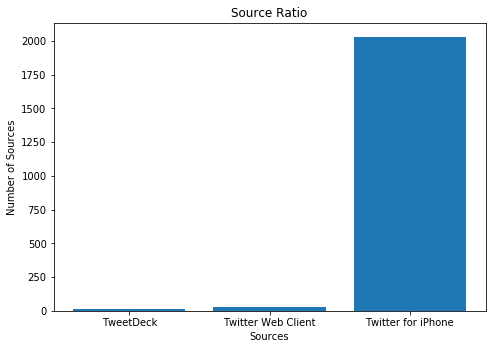

In [152]:
Popular_source=df.source.value_counts()
import matplotlib.pyplot as plt
% matplotlib inline
#plot the graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of Sources')
ax.set_xlabel('Sources')
ax.set_title('Source Ratio')
ax.bar(Popular_source.index.tolist(),Popular_source.tolist())
plt.show()

Base on the graph, Twitter for iPhone had significant number compare to the other source. We can conclude majority user perfer using phone to tweet their dog.

#### Highest retweet count and favorite count

In [144]:
df.retweet_count.max()

79515

In [145]:
df[df.retweet_count == df.retweet_count.max()]

,tweet_id,timestamp,source,text,URL,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
851,744234799360020481,2016-06-18 18:26:18 +0000,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,doggo,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


Base on the table, it show the information of the user who has highest retweet count. Tweet_id:744234799360020481 had the highest retweet count. We can use the data to study why this dog is so popular.

In [146]:
df.favorite_count.max()

132810

In [147]:
df[df.favorite_count == df.favorite_count.max()]

,tweet_id,timestamp,source,text,URL,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
329,822872901745569793,2017-01-21 18:26:02 +0000,Twitter for iPhone,Here's a super supportive puppo participating ...,https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,NaN,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810


Base on the table, it show the information of the user who has highest favorite count. Tweet_id:822872901745569793 had the highest favorite count. We can use the data to study what kind of dog bread and dog feature is more attractive to a person.

#### Highest rating

In [148]:
# Calculated the rating by divide the numerator by 10
Rating=df.rating_numerator/10

In [149]:
df[df.rating_numerator/10 == Rating.max()]

,tweet_id,timestamp,source,text,URL,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
802,749981277374128128,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af....,https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569


Tweet_id:838916489579200512 had the higest rating. But as I observe the table, I saw it's tweer had False prediction. It also has low retweet_count and zero favorite count. 

### Top 10 Popular name for dog

In [150]:
# find out the repeat time for each name
Popular_name=df.name.value_counts()
# i start at 1 because I wanto eliminate the None 
i=1
#store Popular_name into two array
store_value=Popular_name.index.tolist()
store_count=Popular_name.tolist()
#store x and y
store_x=[]
store_y=[]
#perfor a while loop to find top ten name
while i <11:
    store_x.append(store_value[i])
    store_y.append(store_count[i])
    i=i+1

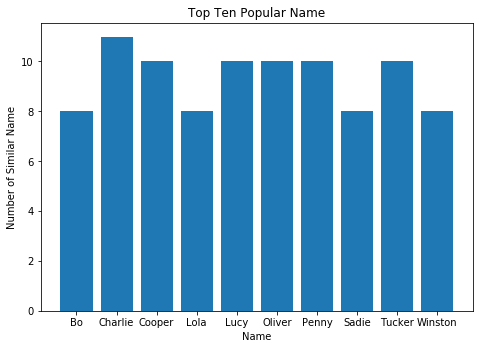

In [153]:
#plot the graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of Similar Name')
ax.set_xlabel('Name')
ax.set_title('Top Ten Popular Name')
ax.bar(store_x,store_y)
plt.show()

Apparently Charlie is the most common name in our DataFrame